In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
vadodara=pd.read_csv(r"C:\Users\PRIYA\WINDOWS FILE\Desktop\DATASCIENCE\CASE STUDY\vadodara price prediction\vadodara_house_price_dataset_new.csv")
vadodara.head()

,h_type,location,society,size,bathroom,balcony,total_sqft,yr_built,furniture,sale_type,...,college,hospital,population,railway,airport,on_road,air_quality,restaurant,park,price
0,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1550.0,2011.0,0,new,...,0,1,2,0,0,1,1,1,1,4361705
1,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1550.0,2012.0,1,new,...,0,1,2,0,0,1,1,1,1,5001905
2,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1860.0,2010.0,1,new,...,0,1,2,0,0,1,1,1,1,5588795
3,apartment,Maneja,Bakeri Swara,2 BHK,2,1,1015.0,2016.0,1,new,...,0,1,2,0,0,1,1,1,1,3184740
4,apartment,Maneja,Bakeri Swara,2 BHK,2,1,1210.0,2019.0,0,new,...,0,1,2,0,0,1,1,1,1,3498895


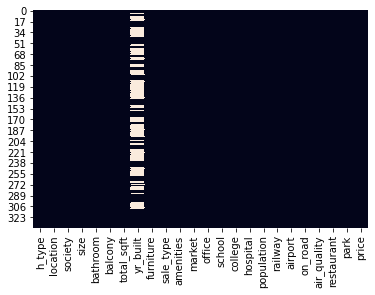

In [3]:
sns.heatmap(vadodara.isnull(),cbar=False)

In [4]:
vadodara.describe()

,bathroom,balcony,total_sqft,yr_built,furniture,amenities,market,office,school,college,hospital,population,railway,airport,on_road,air_quality,restaurant,park,price
count,340.000000,340.000000,340.000000,151.000000,340.000000,340.000000,340.0,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.0,340.0,340.000000,3.400000e+02
mean,2.629412,1.564706,1477.644735,2016.827815,0.382353,0.835294,1.0,0.932353,0.900000,0.279412,0.970588,0.997059,0.167647,0.111765,0.567647,1.0,1.0,0.647059,5.528375e+06
std,0.930166,0.917828,721.120773,3.612500,0.486678,0.625836,0.0,0.251509,0.300442,0.449372,0.169207,0.236725,0.374103,0.315541,0.496133,0.0,0.0,0.478589,5.053439e+06
min,0.000000,0.000000,330.000000,2000.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,7.000000e+05
25%,2.000000,1.000000,1031.500000,2015.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,2.740750e+06
50%,3.000000,1.000000,1329.500000,2018.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,1.0,1.000000,4.095500e+06
75%,3.000000,2.000000,1750.000000,2019.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,1.0,1.000000,6.395000e+06
max,6.000000,5.000000,5241.000000,2024.000000,1.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,4.000000e+07


In [5]:
vadodara.shape

(340, 24)

In [6]:
vadodara=vadodara.drop(["yr_built","society","office","school","college","hospital","population","railway","airport","on_road","air_quality","restaurant","park","furniture","sale_type","amenities","market"],axis=1)

In [7]:
vadodara.shape

(340, 7)

In [8]:
vadodara.head()

,h_type,location,size,bathroom,balcony,total_sqft,price
0,apartment,Maneja,3 BHK,3,1,1550.0,4361705
1,apartment,Maneja,3 BHK,3,1,1550.0,5001905
2,apartment,Maneja,3 BHK,3,1,1860.0,5588795
3,apartment,Maneja,2 BHK,2,1,1015.0,3184740
4,apartment,Maneja,2 BHK,2,1,1210.0,3498895


In [9]:
#dealing with the categorical variables.
labelencoder=LabelEncoder()
#encoding category features.
vadodara.iloc[:,0]=labelencoder.fit_transform(vadodara.iloc[:,0].values)
vadodara.iloc[:,1]=labelencoder.fit_transform(vadodara.iloc[:,1].values)
vadodara.iloc[:,2]=labelencoder.fit_transform(vadodara.iloc[:,2].values)

In [10]:
#splitting the data
A=vadodara.iloc[:250,:]#training
B=vadodara.iloc[250:,:]#test

In [11]:
B.drop(["price"],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
A.shape,B.shape

((250, 7), (90, 6))

In [13]:
#in training data splitting test,train split
x_train=A.drop(["price"],axis=1)
y_train=A['price']

In [14]:
#random forest regressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [15]:
forest.score(x_train,y_train)

0.9352102430011118

In [16]:
y_pred=forest.predict(B)

In [17]:
y_pred

array([ 9142852.52      ,  3341340.        ,  4377958.95      ,
        6388003.85      ,  2603022.5       ,  2995285.85      ,
        2328037.4       ,  5291375.85      ,  2543346.35      ,
        5357760.        ,  5075120.        ,  4688650.        ,
        5993060.        ,  6236660.        ,  6906790.        ,
        2929603.33333333,  6774600.        ,  3097990.        ,
        2861610.        ,  2590606.66666667,  3090125.61666667,
        2834210.        ,  3007120.        ,  2693523.33333333,
        6463730.        ,  3756730.        ,  3818851.35      ,
        6049450.        , 28005631.68      ,  4020275.1       ,
        1744575.        ,  1723935.        ,  4170770.        ,
       11753747.56      , 16395710.        ,  6796210.84      ,
        3626841.1       ,  3188341.15      , 11435971.76      ,
       20963280.84      ,  3208910.        ,  4477758.25      ,
        6305797.7       ,  7757953.6       ,  2373520.        ,
        3328540.        , 14801180.92   

# Gradientboost regressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gradientregressor=GradientBoostingRegressor(max_depth=4,n_estimators=100,learning_rate=0.5)
gradientregressor.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=4)

In [19]:
gradientregressor.score(x_train,y_train)

0.9996178318947478

In [20]:
y_pred2=gradientregressor.predict(B)
y_pred2

array([ 9969754.83161206,  4596410.72396002,  4962462.87206519,
        6023305.35546097,  3015785.86744079,  3176071.30605862,
        3157725.52015027,  6782389.94821071,  2935452.66553707,
        6196546.41132744,  4130834.28521655,  4411466.9891556 ,
        5292219.57831317,  5876715.29910268,  8554346.66557162,
        3040365.92958028,  7556256.04297248,  3491148.25543489,
        1730209.0023477 ,  2617156.83512439,  2182786.1762767 ,
        1623456.26032773,  3457679.07222535,  2046640.78180139,
        6608545.65555387,  6484664.37642474,  3743305.43026549,
        5325273.51746972, 29603427.72079269,  4300187.97396953,
        2052461.0871444 ,  2098919.22041311,  4226573.55017077,
        9142036.72484441, 17765207.39099828,  8892589.24616044,
        3785294.45899168,  2198575.31173827, 10039642.53838564,
       13228584.79168392,  2809610.18081521,  2631810.91917261,
        4954074.80670176,  8916832.00638894,  2535629.39852177,
        3514399.51649948, 12514134.21416

# accuracy increased with gradient boosting

In [21]:
import pickle
filename = 'vadodara1_house_model_gradient.pkl'
pickle.dump(gradientregressor, open(filename, 'wb'))